In [ ]:
import sys
sys.path.append("../")

In [2]:
from real_robots_dont_cry.explore_quality_check import get_filtered_joined_results
from real_robots_dont_cry.gensurvey import QuestionTopic
from real_robots_dont_cry.join_results import get_joined_results, DEMOGRAPHIC_QUESTION_TO_COL
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = get_filtered_joined_results()
#df = get_joined_results()
#print(df.keys())
#print(df.q_kind)
#df = df[df['page_num'] == 0]
#df = df[df['question_topic'] == QuestionKind.ROBOT_COMFORTABLE.value]
#print(df)
df

len(responses)=837
type(responses)=<class 'list'>
len(surveys)=416


,question_id,task_id,ans,question_topic,question_text,bot_desc_cat,q_kind,resp_cat,is_human,is_duplicate,...,survey_id_hash,date_initiated,worker_id_hash,worker_id,worker_hit_num,worker_text_num,Age,Gender,Education,IVA_Use
0,259415096308609482169633007947847055451,9f3b8abc-8da5-4ed3-8f7f-ebf2644e8f9b,4,robot-truthful,The response R gave would be POSSIBLE for R to...,humanoid,truthful,truthful_r-humanoid,False,False,...,16920159668639365928,2022-03-15 14:42:13 -0700,1.543111e+19,AKNYT1NTK2UFK,1.0,1.0,30-49,Female,College or Associates,Prefer not to say
1,201350732421514693011704054703179982350,9f3b8abc-8da5-4ed3-8f7f-ebf2644e8f9b,5,human-truthful,"If instead a HUMAN said the response, would th...",humanoid,truthful,truthful_human,True,False,...,16920159668639365928,2022-03-15 14:42:13 -0700,1.543111e+19,AKNYT1NTK2UFK,1.0,1.0,30-49,Female,College or Associates,Prefer not to say
2,25247365259432353279369166178599595632,9f3b8abc-8da5-4ed3-8f7f-ebf2644e8f9b,5,robot-comfort,I would be COMFORTABLE with R saying the response,humanoid,comfort,comfort_r-humanoid,False,False,...,16920159668639365928,2022-03-15 14:42:13 -0700,1.543111e+19,AKNYT1NTK2UFK,1.0,1.0,30-49,Female,College or Associates,Prefer not to say
3,15524116048336510449618303266927771459,9f3b8abc-8da5-4ed3-8f7f-ebf2644e8f9b,5,human-comfort,"If instead a HUMAN said the response, I would ...",humanoid,comfort,comfort_human,True,False,...,16920159668639365928,2022-03-15 14:42:13 -0700,1.543111e+19,AKNYT1NTK2UFK,1.0,1.0,30-49,Female,College or Associates,Prefer not to say
8,276037338758462092117806698869110605607,9f3b8abc-8da5-4ed3-8f7f-ebf2644e8f9b,5,robot-truthful,The response R gave would be POSSIBLE for R to...,humanoid,truthful,truthful_r-humanoid,False,False,...,16920159668639365928,2022-03-15 14:42:13 -0700,1.543111e+19,AKNYT1NTK2UFK,1.0,1.0,30-49,Female,College or Associates,Prefer not to say
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50215,154942862423666925644323353268491563775,8d970610-b17c-4817-8b77-3017205abd67,5,human-comfort,"If instead a HUMAN said the response, I would ...",chatbot,comfort,comfort_human,True,False,...,2298683593550584876,None,2.497723e+18,A1T9XW8SNUDDY7,1.0,1.0,29 or younger,Male,College or Associates,Once a month
50216,51467765724804238988175199030049919927,8d970610-b17c-4817-8b77-3017205abd67,3,robot-truthful,The response R gave would be POSSIBLE for R to...,chatbot,truthful,truthful_r-chatbot,False,False,...,2298683593550584876,None,2.497723e+18,A1T9XW8SNUDDY7,1.0,1.0,29 or younger,Male,College or Associates,Once a month
50217,221068755450887135688337280095521144586,8d970610-b17c-4817-8b77-3017205abd67,5,human-truthful,"If instead a HUMAN said the response, would th...",chatbot,truthful,truthful_human,True,False,...,2298683593550584876,None,2.497723e+18,A1T9XW8SNUDDY7,1.0,1.0,29 or younger,Male,College or Associates,Once a month
50218,185595329274413560037234416558880147576,8d970610-b17c-4817-8b77-3017205abd67,3,robot-comfort,I would be COMFORTABLE with R saying the response,chatbot,comfort,comfort_r-chatbot,False,False,...,2298683593550584876,None,2.497723e+18,A1T9XW8SNUDDY7,1.0,1.0,29 or younger,Male,College or Associates,Once a month


In [4]:
DEMOGRAPHIC_QUESTION_TO_COL.values()

dict_values(['Age', 'Gender', 'Education', 'IVA_Use'])

In [5]:
df.columns

Index(['question_id', 'task_id', 'ans', 'question_topic', 'question_text',
       'bot_desc_cat', 'q_kind', 'resp_cat', 'is_human', 'is_duplicate',
       'turn_a', 'turn_b', 'text_hash', 'dataset_src', 'is_fake_turn_a',
       'expect_robot_possible', 'expect_human_possible', 'src_dialogue_id',
       'page_num', 'user_explanation', 'survey_id_hash', 'date_initiated',
       'worker_id_hash', 'worker_id', 'worker_hit_num', 'worker_text_num',
       'Age', 'Gender', 'Education', 'IVA_Use'],
      dtype='object')

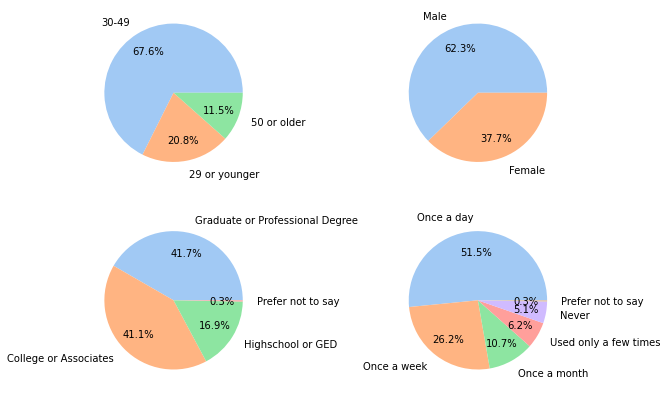

In [6]:
# data = df.index.to_numpy()
# label = df["Age"].to_numpy()
# data = [1,2,3]
# labels = ['1','2','3']
# plt.pie(data, labels=labels)
# plt.show()
fig, axs = plt.subplots(2, 2, figsize=(10,7))
colors = sns.color_palette('pastel')[0:10]
axs[0,0].pie(df["Age"].value_counts().to_numpy(), labels=df["Age"].value_counts().index.to_numpy(), colors=colors, autopct='%0.01f%%', pctdistance=0.7, labeldistance=1.2)
axs[0,1].pie(df["Gender"].value_counts().to_numpy(), labels=df["Gender"].value_counts().index.to_numpy(), colors=colors, autopct='%0.01f%%', pctdistance=0.7, labeldistance=1.2)
axs[1,0].pie(df["Education"].value_counts().to_numpy(), labels=df["Education"].value_counts().index.to_numpy(), colors=colors, autopct='%0.01f%%', pctdistance=0.7, labeldistance=1.2)
axs[1,1].pie(df["IVA_Use"].value_counts().to_numpy(), labels=df["IVA_Use"].value_counts().index.to_numpy(), colors=colors, autopct='%0.01f%%', pctdistance=0.7, labeldistance=1.2)
plt.show()

/home/yuli23/miniconda3/envs/lab/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
<ipython-input-7-f10a384c7d1d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bar['Age'] = pd.Categorical(df_bar['Age'], ['29 or younger','30-49','50 or older'])
<ipython-input-7-f10a384c7d1d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

18460


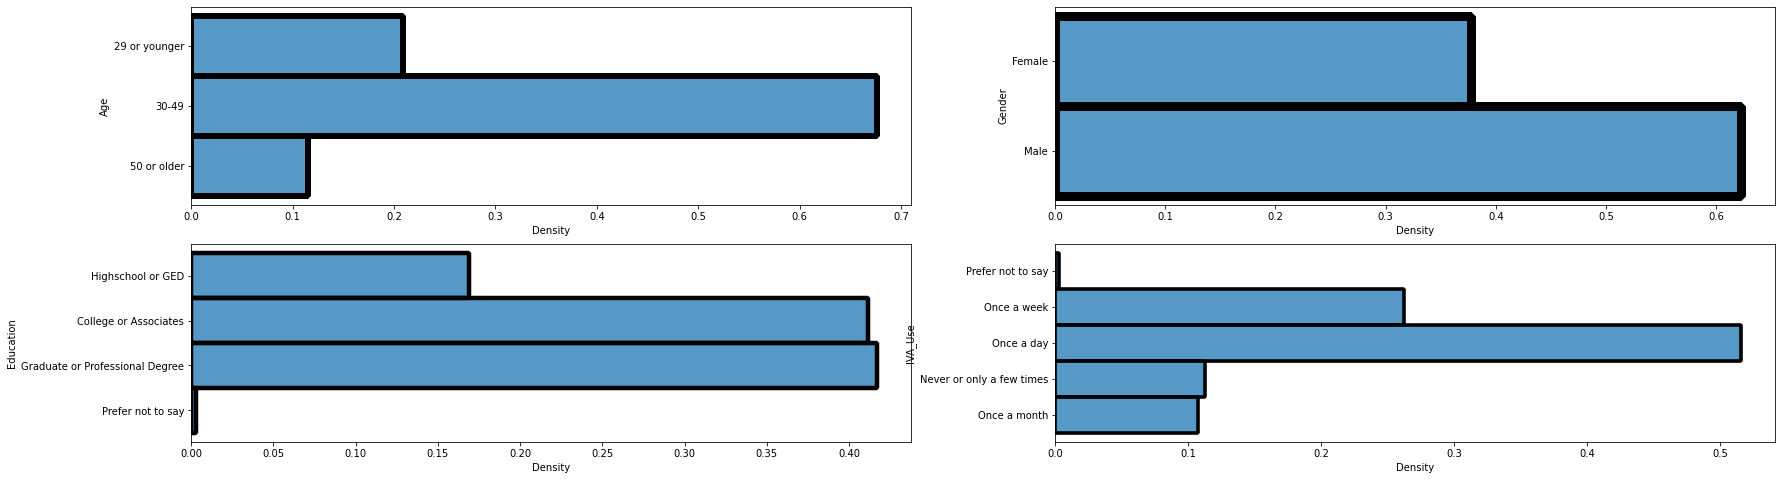

In [7]:
import pandas as pd
ANALYSE_QUESTION = ["robot-truthful"]
fig, axs = plt.subplots(2, 2, figsize=(11,8))
plt.subplots_adjust(left=5, bottom=None, right=7, top=None, wspace=None, hspace=None)
df_bar = df[['Age', 'Gender', 'Education', 'IVA_Use', 'ans', 'question_topic', 'dataset_src']]
df_bar.loc[df_bar["IVA_Use"] == "Used only a few times", "IVA_Use"] = "Never or only a few times"
df_bar.loc[df_bar["IVA_Use"] == "Never", "IVA_Use"] = "Never or only a few times"
df_bar['Age'] = pd.Categorical(df_bar['Age'], ['29 or younger','30-49','50 or older'])
df_bar['Education'] = pd.Categorical(df_bar['Education'], ['Highschool or GED', 'College or Associates','Graduate or Professional Degree','Prefer not to say'])
sns.histplot(df_bar, y="Age", ax=axs[0,0], stat = 'density', bins="dice_max", discrete=True)
sns.histplot(df_bar, y="Gender", ax=axs[0,1], stat = 'density', bins="dice_max", discrete=True)
sns.histplot(df_bar, y="Education", ax=axs[1,0], stat = 'density', bins="dice_max", discrete=True)
sns.histplot(df_bar, y="IVA_Use", ax=axs[1,1], stat = 'density', bins="dice_max", discrete=True)
print(len(df_bar))
# ax.set_ylabel('')
# plt.show()

In [8]:
print(df_bar['dataset_src'].unique())

['reddit_small' 'blender2.7B_human_eval' 'persuasion_for_good'
 'ruar_blender2' 'empathetic_dialogues_listener' 'wizard_of_wikipedia'
 'multi_woz_v22' 'personachat_personas' 'msc']


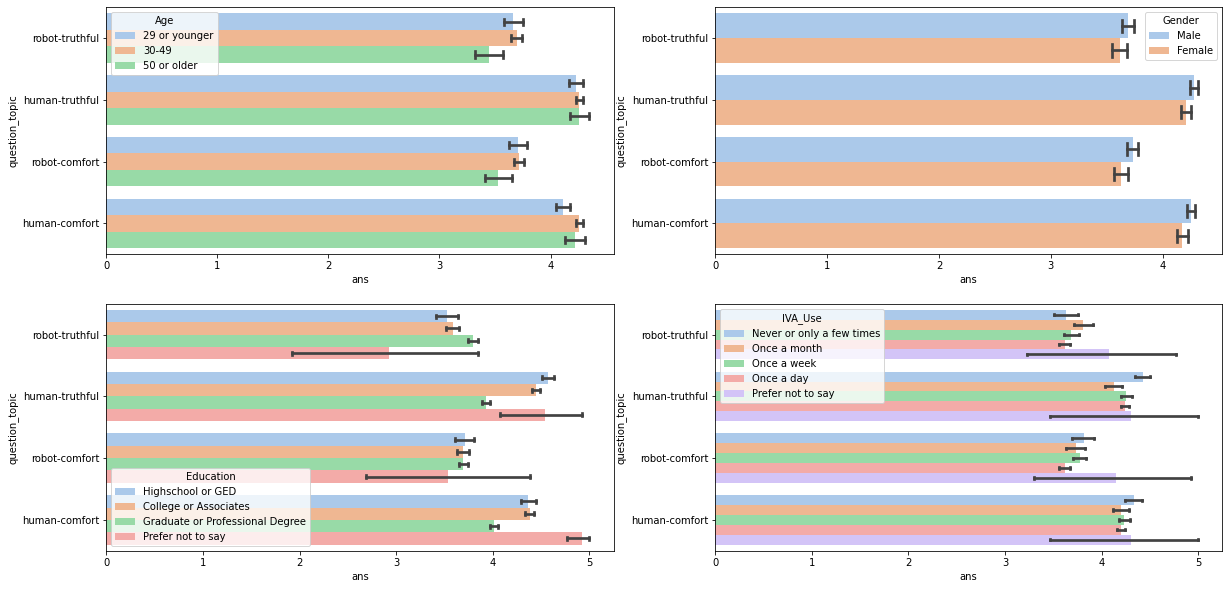

In [9]:
# df_bar = df_bar[df_filtered['question_topic'].isin(ANALYSE_QUESTION)]
fig, axs = plt.subplots(2, 2, figsize=(20,10))
colors = sns.color_palette('pastel')[0:10]
sns.barplot(x="ans", y="question_topic", hue = 'Age', hue_order=['29 or younger', '30-49', '50 or older'], data=df_bar, capsize=.1, ax=axs[0,0], palette=colors)
sns.barplot(x="ans", y="question_topic", hue = 'Gender', hue_order=['Male', 'Female'], data=df_bar, capsize=.2, ax=axs[0,1], palette=colors)
sns.barplot(x="ans", y="question_topic", hue = 'Education', hue_order=['Highschool or GED', 'College or Associates', 'Graduate or Professional Degree', 'Prefer not to say'], data=df_bar, capsize=.05, ax=axs[1,0], palette=colors)
sns.barplot(x="ans", y="question_topic", hue = 'IVA_Use', hue_order=['Never or only a few times', 'Once a month', 'Once a week', 'Once a day', 'Prefer not to say'], data=df_bar, capsize=.02, ax=axs[1,1], palette=colors)

plt.show()

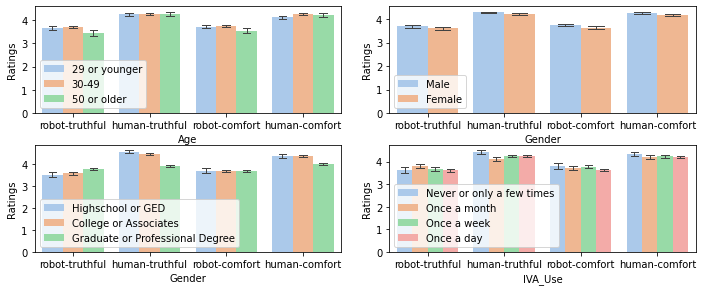

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10,4))
fig.tight_layout()
colors = sns.color_palette('pastel')[0:10]

s1 = sns.barplot(x="question_topic", y="ans", hue = 'Age', hue_order=['29 or younger', '30-49', '50 or older'], data=df_bar, capsize=.1, ax=axs[0, 0], palette=colors, errwidth=1)
s1.set_xlabel( "Age" , size = 10)
s1.set_ylabel( "Ratings" , size = 10)
s1.legend(loc='lower left',title=None)

s2 = sns.barplot(x="question_topic", y="ans", hue = 'Gender', hue_order=['Male', 'Female'], data=df_bar, capsize=.2, ax=axs[0,1], palette=colors, errwidth=1)
s2.set_xlabel( "Gender" , size = 10)
s2.set_ylabel( "Ratings" , size = 10)
s2.legend(loc='lower left',title=None)

s3 = sns.barplot(x="question_topic", y="ans", hue = 'Education', hue_order=['Highschool or GED', 'College or Associates', 'Graduate or Professional Degree'], data=df_bar, capsize=.1, ax=axs[1,0], palette=colors, errwidth=1)
s3.set_xlabel( "Gender" , size = 10)
s3.set_ylabel( "Ratings" , size = 10)
s3.legend(loc='lower left',title=None)

s4 = sns.barplot(x="question_topic", y="ans", hue = 'IVA_Use', hue_order=['Never or only a few times', 'Once a month', 'Once a week', 'Once a day'], data=df_bar, capsize=.1, ax=axs[1,1], palette=colors, errwidth=1)
s4.set_xlabel( "IVA_Use" , size = 10)
s4.set_ylabel( "Ratings" , size = 10)
s4.legend(loc='lower left',title=None)
plt.savefig('demographics1.png', dpi=1200)
plt.show()

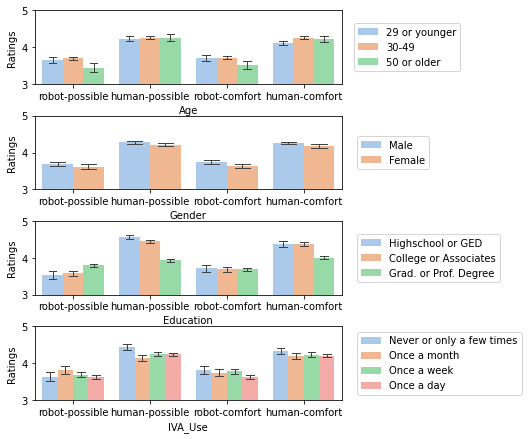

In [32]:
fig, axs = plt.subplots(4, 1, figsize=(5,6))
fig.tight_layout()
colors = sns.color_palette('pastel')[0:10]

df_bar2 = df_bar.copy()
df_bar2['Education'] = df_bar2['Education'].replace(['Graduate or Professional Degree'],"Grad. or Prof. Degree")
df_bar2['question_topic'] = df_bar2['question_topic'].replace(['robot-truthful'],"robot-possible")
df_bar2['question_topic'] = df_bar2['question_topic'].replace(['human-truthful'],"human-possible")

s1 = sns.barplot(x="question_topic", y="ans", hue = 'Age', hue_order=['29 or younger', '30-49', '50 or older'], data=df_bar2, capsize=.1, ax=axs[0], palette=colors, errwidth=1)
s1.set_xlabel( "Age" , size = 10)
s1.set_ylabel( "Ratings" , size = 10)
s1.set_ylim([3, 5])
s1.legend(loc='right',title=None, bbox_to_anchor=(1.4, 0.5))

s2 = sns.barplot(x="question_topic", y="ans", hue = 'Gender', hue_order=['Male', 'Female'], data=df_bar2, capsize=.2, ax=axs[1], palette=colors, errwidth=1)
s2.set_xlabel( "Gender" , size = 10)
s2.set_ylabel( "Ratings" , size = 10)
s2.set_ylim([3, 5])
s2.legend(loc='right',title=None, bbox_to_anchor=(1.3, 0.5))

s3 = sns.barplot(x="question_topic", y="ans", hue = 'Education', hue_order=['Highschool or GED', 'College or Associates', 'Grad. or Prof. Degree'], data=df_bar2, capsize=.1, ax=axs[2], palette=colors, errwidth=1)
s3.set_xlabel( "Education" , size = 10)
s3.set_ylabel( "Ratings" , size = 10)
s3.set_ylim([3, 5])
s3.legend(loc='right',title=None, bbox_to_anchor=(1.53, 0.5))

s4 = sns.barplot(x="question_topic", y="ans", hue = 'IVA_Use', hue_order=['Never or only a few times', 'Once a month', 'Once a week', 'Once a day'], data=df_bar2, capsize=.1, ax=axs[3], palette=colors, errwidth=1)
s4.set_xlabel( "IVA_Use" , size = 10)
s4.set_ylabel( "Ratings" , size = 10)
s4.set_ylim([3, 5])
s4.legend(loc='right',title=None, bbox_to_anchor=(1.6, 0.5))
plt.savefig('demographics2.png', dpi=1200, bbox_inches='tight')
plt.show()

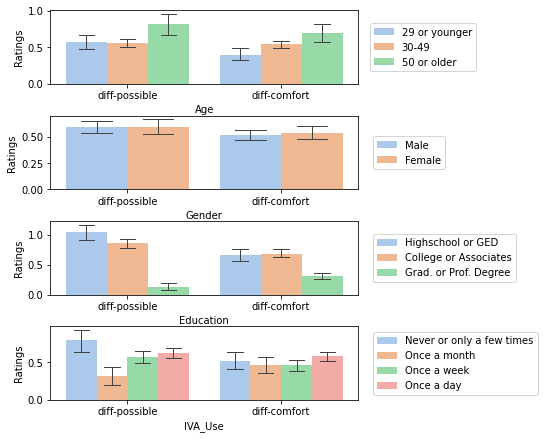

In [33]:
fig, axs = plt.subplots(4, 1, figsize=(5,6))
fig.tight_layout()
colors = sns.color_palette('pastel')[0:10]

df_bar3 = df_bar.copy()
df_bar3['Education'] = df_bar3['Education'].replace(['Graduate or Professional Degree'],"Grad. or Prof. Degree")
df_bar3['question_topic'] = df_bar3['question_topic'].replace(['robot-truthful'],"robot-possible")
df_bar3['question_topic'] = df_bar3['question_topic'].replace(['human-truthful'],"human-possible")

sub_df_bar3_human_possible = df_bar3[df_bar3.question_topic == "human-possible"]
sub_df_bar3_human_possible = sub_df_bar3_human_possible.reset_index(drop=True)
sub_df_bar3_robot_possible = df_bar3[df_bar3.question_topic == "robot-possible"]
sub_df_bar3_robot_possible = sub_df_bar3_robot_possible.reset_index(drop=True)
sub_df_bar3_human_comfort = df_bar3[df_bar3.question_topic == "human-comfort"]
sub_df_bar3_human_comfort = sub_df_bar3_human_comfort.reset_index(drop=True)
sub_df_bar3_robot_comfort = df_bar3[df_bar3.question_topic == "robot-comfort"]
sub_df_bar3_robot_comfort = sub_df_bar3_robot_comfort.reset_index(drop=True)

sub_df_bar3_diff_possible = sub_df_bar3_human_possible.copy()
sub_df_bar3_diff_possible['question_topic'] = sub_df_bar3_diff_possible['question_topic'].replace(['human-possible'],"diff-possible")
sub_df_bar3_diff_possible['ans'] =  sub_df_bar3_human_possible ['ans'] - sub_df_bar3_robot_possible['ans']

sub_df_bar3_diff_comfort = sub_df_bar3_human_comfort.copy()
sub_df_bar3_diff_comfort['question_topic'] = sub_df_bar3_diff_comfort['question_topic'].replace(['human-comfort'],"diff-comfort")
sub_df_bar3_diff_comfort['ans'] =  sub_df_bar3_human_comfort ['ans'] - sub_df_bar3_robot_comfort['ans']

df_bar3_sum = pd.concat([sub_df_bar3_diff_possible, sub_df_bar3_diff_comfort])
df_bar3_sum

s1 = sns.barplot(x="question_topic", y="ans", hue = 'Age', hue_order=['29 or younger', '30-49', '50 or older'], data=df_bar3_sum, capsize=.1, ax=axs[0], palette=colors, errwidth=1)
s1.set_xlabel( "Age" , size = 10)
s1.set_ylabel( "Ratings" , size = 10)

s1.legend(loc='right',title=None, bbox_to_anchor=(1.4, 0.5))

s2 = sns.barplot(x="question_topic", y="ans", hue = 'Gender', hue_order=['Male', 'Female'], data=df_bar3_sum, capsize=.2, ax=axs[1], palette=colors, errwidth=1)
s2.set_xlabel( "Gender" , size = 10)
s2.set_ylabel( "Ratings" , size = 10)

s2.legend(loc='right',title=None, bbox_to_anchor=(1.3, 0.5))

s3 = sns.barplot(x="question_topic", y="ans", hue = 'Education', hue_order=['Highschool or GED', 'College or Associates', 'Grad. or Prof. Degree'], data=df_bar3_sum, capsize=.1, ax=axs[2], palette=colors, errwidth=1)
s3.set_xlabel( "Education" , size = 10)
s3.set_ylabel( "Ratings" , size = 10)

s3.legend(loc='right',title=None, bbox_to_anchor=(1.53, 0.5))

s4 = sns.barplot(x="question_topic", y="ans", hue = 'IVA_Use', hue_order=['Never or only a few times', 'Once a month', 'Once a week', 'Once a day'], data=df_bar3_sum, capsize=.1, ax=axs[3], palette=colors, errwidth=1)
s4.set_xlabel( "IVA_Use" , size = 10)
s4.set_ylabel( "Ratings" , size = 10)

s4.legend(loc='right',title=None, bbox_to_anchor=(1.6, 0.5))
plt.savefig('demographics-diff.png', dpi=1200, bbox_inches='tight')
plt.show()

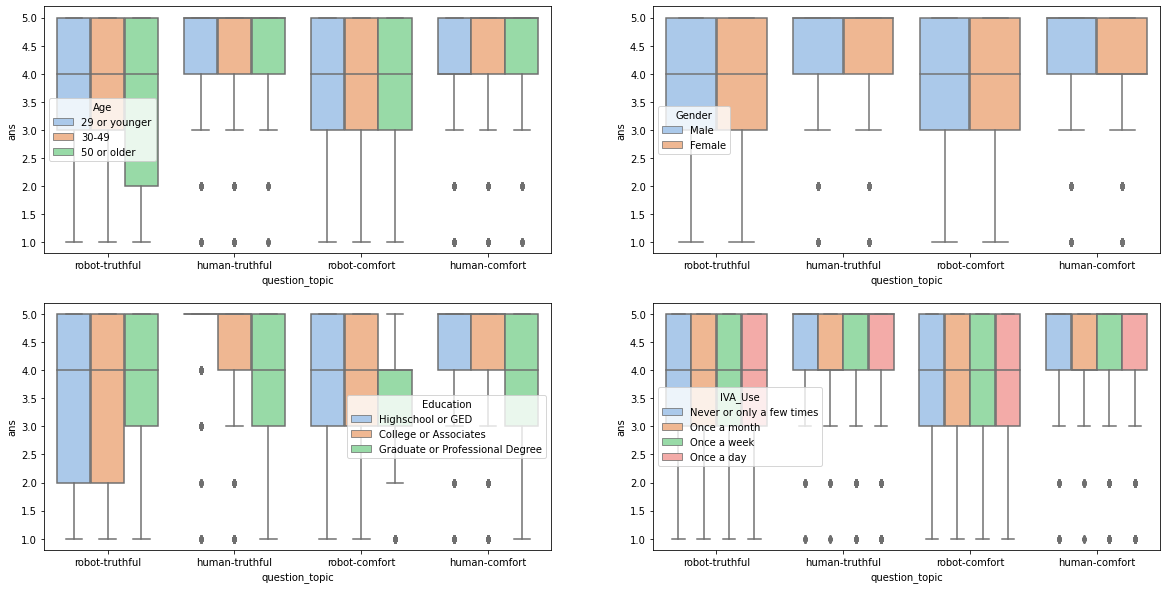

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
colors = sns.color_palette('pastel')[0:10]
sns.boxplot(x="question_topic", y="ans", hue = 'Age', hue_order=['29 or younger', '30-49', '50 or older'], data=df_bar, ax=axs[0,0], palette=colors)
sns.boxplot(x="question_topic", y="ans", hue = 'Gender', hue_order=['Male', 'Female'], data=df_bar, ax=axs[0,1], palette=colors)
sns.boxplot(x="question_topic", y="ans", hue = 'Education', hue_order=['Highschool or GED', 'College or Associates', 'Graduate or Professional Degree'], data=df_bar, ax=axs[1,0], palette=colors)
sns.boxplot(x="question_topic", y="ans", hue = 'IVA_Use', hue_order=['Never or only a few times', 'Once a month', 'Once a week', 'Once a day'], data=df_bar, ax=axs[1,1], palette=colors)

plt.show()

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

print(df.columns)
print(df.question_topic.unique())
print(df.q_kind.unique())
print(df.dataset_src.unique())
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

print(df.columns)
print(df.question_topic.unique())
print(df.q_kind.unique())
print(df.dataset_src.unique())
df_show = df[['Age', 'Gender', 'Education', 'IVA_Use', 'ans', 'question_topic', 'dataset_src']]
df_show = df_show[df.question_topic == 'robot-truthful']
Gender_d = pd.get_dummies(df_show['Gender'], prefix='Gender')
Age_d = pd.get_dummies(df_show['Age'], prefix='Age')
Education_d = pd.get_dummies(df_show['Education'], prefix='Education')
IVA_Use_d = pd.get_dummies(df_show['IVA_Use'], prefix='IVA_Use')
df_show = pd.concat([df_show, Gender_d[0:]], axis=1)
df_show = pd.concat([df_show, Age_d[0:]], axis=1)
df_show = pd.concat([df_show, Education_d[0:]], axis=1)
df_show = pd.concat([df_show, IVA_Use_d[0:]], axis=1)
df_show['const'] = 1
print(df_show.columns)

Index(['question_id', 'task_id', 'ans', 'question_topic', 'question_text',
       'bot_desc_cat', 'q_kind', 'resp_cat', 'is_human', 'is_duplicate',
       'turn_a', 'turn_b', 'text_hash', 'dataset_src', 'is_fake_turn_a',
       'expect_robot_possible', 'expect_human_possible', 'src_dialogue_id',
       'page_num', 'user_explanation', 'survey_id_hash', 'date_initiated',
       'worker_id_hash', 'worker_id', 'worker_hit_num', 'worker_text_num',
       'Age', 'Gender', 'Education', 'IVA_Use'],
      dtype='object')
['robot-truthful' 'human-truthful' 'robot-comfort' 'human-comfort']
['truthful' 'comfort']
['reddit_small' 'blender2.7B_human_eval' 'persuasion_for_good'
 'ruar_blender2' 'empathetic_dialogues_listener' 'wizard_of_wikipedia'
 'multi_woz_v22' 'personachat_personas' 'msc']
Index(['question_id', 'task_id', 'ans', 'question_topic', 'question_text',
       'bot_desc_cat', 'q_kind', 'resp_cat', 'is_human', 'is_duplicate',
       'turn_a', 'turn_b', 'text_hash', 'dataset_src', 'is_fak

In [14]:
# standardized
Y_norm = pd.Series(stats.zscore(df['ans']), name='ans')
print(Y_norm.head(30))

0     0.034300
1     0.853425
2     0.853425
3     0.853425
4     0.853425
5     0.853425
6     0.853425
7     0.853425
8     0.853425
9     0.853425
10    0.853425
11    0.853425
12   -2.423072
13   -2.423072
14   -2.423072
15   -2.423072
16   -2.423072
17   -2.423072
18   -2.423072
19   -2.423072
20    0.853425
21    0.853425
22    0.853425
23    0.853425
24   -0.784824
25    0.853425
26   -0.784824
27    0.853425
28    0.853425
29    0.853425
Name: ans, dtype: float64


['30-49' '50 or older' '29 or younger']
['Female' 'Male']
['Highschool or GED' 'College or Associates'
 'Graduate or Professional Degree']
['Once a week' 'Once a day' 'Used only a few times' 'Once a month' 'Never']
HUMAN_POSSIBLE
                            OLS Regression Results                            
Dep. Variable:                    ans   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     43.65
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           1.24e-67
Time:                        23:13:28   Log-Likelihood:                -5608.8
No. Observations:                4081   AIC:                         1.124e+04
Df Residuals:                    4072   BIC:                         1.129e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                      

/home/yuli23/miniconda3/envs/lab/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


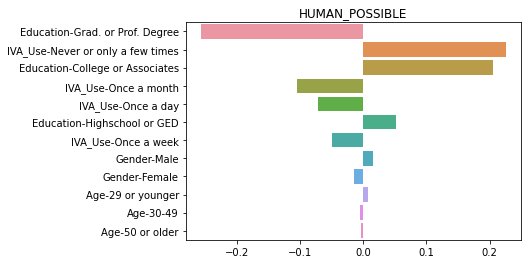

HUMAN_COMFORTABLE
                            OLS Regression Results                            
Dep. Variable:                    ans   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     17.79
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           2.37e-26
Time:                        23:13:30   Log-Likelihood:                -5861.4
No. Observations:                4081   AIC:                         1.174e+04
Df Residuals:                    4072   BIC:                         1.180e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

/home/yuli23/miniconda3/envs/lab/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


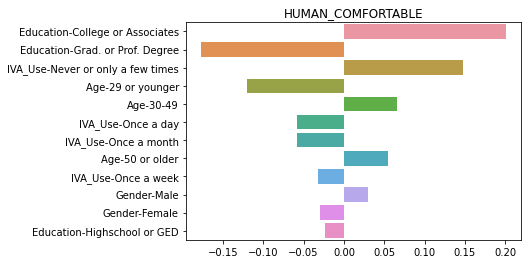

ROBOT_POSSIBLE
                            OLS Regression Results                            
Dep. Variable:                    ans   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     10.25
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           2.70e-14
Time:                        23:13:33   Log-Likelihood:                -7188.8
No. Observations:                4081   AIC:                         1.440e+04
Df Residuals:                    4072   BIC:                         1.445e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

/home/yuli23/miniconda3/envs/lab/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


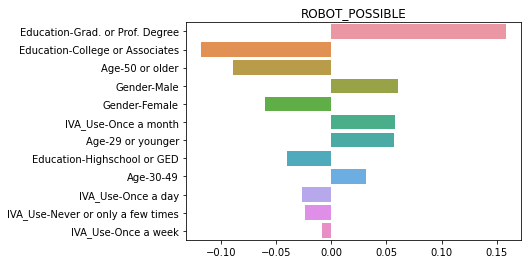

ROBOT_COMFORTABLE
                            OLS Regression Results                            
Dep. Variable:                    ans   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.752
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           7.97e-06
Time:                        23:13:35   Log-Likelihood:                -6869.8
No. Observations:                4081   AIC:                         1.376e+04
Df Residuals:                    4072   BIC:                         1.381e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

/home/yuli23/miniconda3/envs/lab/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


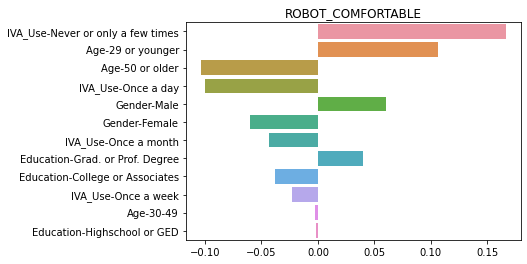

In [47]:

df = df[df.dataset_src != 'multi_woz_v22']
df = df[df.IVA_Use != 'Prefer not to say']
df = df[df.Education != 'Prefer not to say']
print(df["Age"].unique())
print(df["Gender"].unique())
print(df["Education"].unique())
print(df["IVA_Use"].unique())
# Run LMER
for q_topic in QuestionTopic:
    print(q_topic.name)
    use_df = df[df.question_topic == q_topic.value]
    use_df.loc[use_df["IVA_Use"] == "Used only a few times", "IVA_Use"] = "Never or only a few times"
    use_df.loc[use_df["IVA_Use"] == "Never", "IVA_Use"] = "Never or only a few times"
    # md = smf.mixedlm(
    #     "ans ~ Age+Education+IVA_Use+Gender",
    #     data=use_df,
    #     groups=use_df["dataset_src"],
    # )
    Gender_d = pd.get_dummies(use_df['Gender'], prefix='Gender')
    Age_d = pd.get_dummies(use_df['Age'], prefix='Age')
    Education_d = pd.get_dummies(use_df['Education'], prefix='Education')
    IVA_Use_d = pd.get_dummies(use_df['IVA_Use'], prefix='IVA_Use')
    use_df = pd.concat([use_df, Gender_d[0:]], axis=1)
    use_df = pd.concat([use_df, Age_d[0:]], axis=1)
    use_df = pd.concat([use_df, Education_d[0:]], axis=1)
    use_df = pd.concat([use_df, IVA_Use_d[0:]], axis=1)
    use_df['const'] = 1
    # use_df = use_df[['ans', 'Gender_Female', 'Gender_Male', 'Age_29 or younger',
    #    'Age_30-49', 'Age_50 or older', 'Education_College or Associates',
    #    'Education_Graduate or Professional Degree',
    #    'Education_Highschool or GED', 'IVA_Use_Never', 'IVA_Use_Once a day',
    #    'IVA_Use_Once a month', 'IVA_Use_Once a week',
    #    'IVA_Use_Used only a few times', 'dataset_src', 'const']]
    Y = use_df['ans']
    Y_norm = pd.Series(stats.zscore(use_df['ans']), name='ans')
    X = use_df[['Gender_Female', 'Gender_Male', 'Age_29 or younger',
       'Age_30-49', 'Age_50 or older', 'Education_College or Associates',
       'Education_Graduate or Professional Degree',
       'Education_Highschool or GED', 'IVA_Use_Never or only a few times', 'IVA_Use_Once a day',
       'IVA_Use_Once a month', 'IVA_Use_Once a week']]
    X1_norm = pd.DataFrame(stats.zscore(X))
    X1_norm.columns = X.columns
    md = sm.OLS.from_formula(formula="ans ~ Gender+Education+Age+IVA_Use", data=use_df)
    # md = sm.OLS(Y_norm, X1_norm)
    results = md.fit()
    print(results.summary())
    print(results.params)
    print(results.pvalues)
    coeff = results.params
    pvalues = results.pvalues
    coeff = coeff.drop(['Intercept'])
    pvalues = pvalues.drop(['Intercept'])
    coeff["Gender[T.Male]"] = coeff["Gender[T.Male]"]/2
    coeff["Gender[T.Female]"] = 0 - coeff["Gender[T.Male]"]
    
    coeff["Age[T.30-49]"] = coeff["Age[T.30-49]"]/2
    coeff["Age[T.50 or older]"] = coeff["Age[T.50 or older]"]/2
    coeff["Age[T.29 or younger]"] = 0 - (coeff["Age[T.30-49]"] + coeff["Age[T.50 or older]"])
    
    coeff["Education[T.Graduate or Professional Degree]"] = coeff["Education[T.Graduate or Professional Degree]"]/2
    coeff["Education[T.Highschool or GED]"] = coeff["Education[T.Highschool or GED]"]/2
    coeff["Education[T.College or Associates]"] = 0 - (coeff["Education[T.Graduate or Professional Degree]"] + coeff["Education[T.Highschool or GED]"])
    
    coeff["IVA_Use[T.Once a day]"] = coeff["IVA_Use[T.Once a day]"]/2
    coeff["IVA_Use[T.Once a month]"] = coeff["IVA_Use[T.Once a month]"]/2
    coeff["IVA_Use[T.Once a week]"] = coeff["IVA_Use[T.Once a week]"]/2
    coeff["IVA_Use[T.Never or only a few times]"] = 0 - (coeff["IVA_Use[T.Once a day]"] + coeff["IVA_Use[T.Once a month]"] + coeff["IVA_Use[T.Once a week]"])
    print(type(coeff))
    
    for index, value in pvalues.items():
        print(f"Index : {index}, Value : {value}")
    
    coeff.rename(index = {'Gender[T.Male]':'Gender-Male',
                            'Gender[T.Female]':'Gender-Female',
                            'Age[T.30-49]':'Age-30-49',
                            'Age[T.50 or older]':'Age-50 or older',
                            'Age[T.29 or younger]':'Age-29 or younger',
                            'Education[T.Graduate or Professional Degree]':'Education-Grad. or Prof. Degree',
                            'Education[T.Highschool or GED]':'Education-Highschool or GED',
                            'Education[T.College or Associates]':'Education-College or Associates',
                            'IVA_Use[T.Once a day]':'IVA_Use-Once a day',
                            'IVA_Use[T.Once a month]':'IVA_Use-Once a month',
                            'IVA_Use[T.Once a week]':'IVA_Use-Once a week',
                            'IVA_Use[T.Never or only a few times]':'IVA_Use-Never or only a few times',}, inplace = True)
    
    
    coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
    sns.barplot(x=coeff.values, y=coeff.index, orient='h').set(title=q_topic.name)
    plt.savefig('demo-analysis-' + q_topic.name + '.png', dpi=1200, bbox_inches='tight')
    plt.show()
    # sns.pairplot(use_df[['Age_29 or younger','Age_30-49', 'Age_50 or older', 'Gender_Female', 'Gender_Male']]);
    # print(results.params)


In [16]:
# Features Analysis
from textblob import TextBlob
from scipy import stats
import nltk
import language_tool_python
from profanity_check import predict, predict_prob
from tqdm import tqdm
tqdm.pandas()

# grammar tool
my_tool = language_tool_python.LanguageTool('en-US')  

df_features = df.copy()
df_features = df_features.reset_index()  # make sure indexes pair with number of rows

def get_sentiment(row):
    return TextBlob(row['turn_b']).sentiment.polarity

df_features['sentiment'] = df_features.progress_apply(get_sentiment, axis=1)

def get_length(row):
    words = nltk.word_tokenize(row['turn_b'])
    return len(words)

df_features['length'] = df_features.progress_apply(get_length, axis=1)

def get_profanity(row):
    return predict_prob([row['turn_b']]).tolist()[0]

df_features['profanity'] = df_features.progress_apply(get_profanity, axis=1)

def get_grammar(row):
    my_matches = my_tool.check(row['turn_b'])
    return len(my_matches)

df_features['grammar'] = df_features.progress_apply(get_grammar, axis=1)


/home/yuli23/miniconda3/envs/lab/lib/python3.8/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/home/yuli23/miniconda3/envs/lab/lib/python3.8/site-packages/sklearn/base.py:313: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.20.2 when using version 0.22.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/yuli23/miniconda3/envs/lab/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.svm.classes module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should ins

KeyboardInterrupt: 

In [ ]:
print('spearman correlation coefficient with associated p-value.')
print("sentiment")
print(stats.spearmanr(df_features['sentiment'], df_features['ans']))
print("length")
print(stats.spearmanr(df_features['length'], df_features['ans']))
print("grammar")
print(stats.spearmanr(df_features['grammar'], df_features['ans']))
print("profanity")
print(stats.spearmanr(df_features['profanity'], df_features['ans']))


In [ ]:
for q_topic in QuestionTopic:
    print("======================")
    print(q_topic.name)
    use_df_features = df_features[df_features.question_topic == q_topic.value]
    print('spearman correlation coefficient with associated p-value.')
    
    print('---')
    print("sentiment")
    f1 = sns.barplot(y="sentiment", x="ans", data=use_df_features)
    plt.show()
    print(stats.spearmanr(use_df_features['sentiment'], use_df_features['ans']))
    print('---')
    print("length")
    f2 = sns.barplot(y="length", x="ans", data=use_df_features)
    plt.show()
    print(stats.spearmanr(use_df_features['length'], use_df_features['ans']))
    print('---')
    print("grammar")
    f3 = sns.barplot(y="grammar", x="ans", data=use_df_features)
    plt.show()
    print(stats.spearmanr(use_df_features['grammar'], use_df_features['ans']))
    print('---')
    print("profanity")
    f4 = sns.barplot(y="profanity", x="ans", data=use_df_features)
    plt.show()
    print(stats.spearmanr(use_df_features['profanity'], use_df_features['ans']))

In [37]:
from features import get_features_df

df_test = get_features_df()
df_test

len(responses)=837
type(responses)=<class 'list'>
len(surveys)=416


100%|██████████| 18460/18460 [07:38<00:00, 40.24it/s]


,index,question_id,task_id,ans,question_topic,question_text,bot_desc_cat,q_kind,resp_cat,is_human,...,worker_hit_num,worker_text_num,Age,Gender,Education,IVA_Use,sentiment,length,profanity,grammar
0,0,259415096308609482169633007947847055451,9f3b8abc-8da5-4ed3-8f7f-ebf2644e8f9b,4,robot-truthful,The response R gave would be POSSIBLE for R to...,humanoid,truthful,truthful_r-humanoid,False,...,1.0,1.0,30-49,Female,College or Associates,Prefer not to say,0.183333,45,0.012047,1
1,1,201350732421514693011704054703179982350,9f3b8abc-8da5-4ed3-8f7f-ebf2644e8f9b,5,human-truthful,"If instead a HUMAN said the response, would th...",humanoid,truthful,truthful_human,True,...,1.0,1.0,30-49,Female,College or Associates,Prefer not to say,0.183333,45,0.012047,1
2,2,25247365259432353279369166178599595632,9f3b8abc-8da5-4ed3-8f7f-ebf2644e8f9b,5,robot-comfort,I would be COMFORTABLE with R saying the response,humanoid,comfort,comfort_r-humanoid,False,...,1.0,1.0,30-49,Female,College or Associates,Prefer not to say,0.183333,45,0.012047,1
3,3,15524116048336510449618303266927771459,9f3b8abc-8da5-4ed3-8f7f-ebf2644e8f9b,5,human-comfort,"If instead a HUMAN said the response, I would ...",humanoid,comfort,comfort_human,True,...,1.0,1.0,30-49,Female,College or Associates,Prefer not to say,0.183333,45,0.012047,1
4,8,276037338758462092117806698869110605607,9f3b8abc-8da5-4ed3-8f7f-ebf2644e8f9b,5,robot-truthful,The response R gave would be POSSIBLE for R to...,humanoid,truthful,truthful_r-humanoid,False,...,1.0,1.0,30-49,Female,College or Associates,Prefer not to say,0.400000,21,0.104278,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18455,50215,154942862423666925644323353268491563775,8d970610-b17c-4817-8b77-3017205abd67,5,human-comfort,"If instead a HUMAN said the response, I would ...",chatbot,comfort,comfort_human,True,...,1.0,1.0,29 or younger,Male,College or Associates,Once a month,0.000000,11,0.133220,1
18456,50216,51467765724804238988175199030049919927,8d970610-b17c-4817-8b77-3017205abd67,3,robot-truthful,The response R gave would be POSSIBLE for R to...,chatbot,truthful,truthful_r-chatbot,False,...,1.0,1.0,29 or younger,Male,College or Associates,Once a month,0.375000,19,0.052172,0
18457,50217,221068755450887135688337280095521144586,8d970610-b17c-4817-8b77-3017205abd67,5,human-truthful,"If instead a HUMAN said the response, would th...",chatbot,truthful,truthful_human,True,...,1.0,1.0,29 or younger,Male,College or Associates,Once a month,0.375000,19,0.052172,0
18458,50218,185595329274413560037234416558880147576,8d970610-b17c-4817-8b77-3017205abd67,3,robot-comfort,I would be COMFORTABLE with R saying the response,chatbot,comfort,comfort_r-chatbot,False,...,1.0,1.0,29 or younger,Male,College or Associates,Once a month,0.375000,19,0.052172,0
